# NLP analysis for Website

This script generates word clouds for articles related to (i) Obama, (ii) McCain, (iii) the n=10 largest connected components in our article network. 

The following should be included on our website:

**How did the rhetorics of news articles around Obama and McCain differ?**

Going further than the sentiment of the articles, we also analyzed the words used in articles related to Obama and his republican counterpart John McCain. The words most often used in their context are visualized in two word clouds. Blue for the Obama and red for McCain. A striking difference between the two, is how often Obama was used in articles with McCain, whereas the name McCain did not appear nearly as often in articles with Obama. This may likely be due to our analysis period. We analyze articles from 2008 to 2009. While both names are likely to be used in the same article before the election, the focus shifts to the winner right. By the end of 2008, after Obama was elected, McCain did not get nearly as much media attention anymore.

*** Show word cloud of Obama and McCain ***

**What are the large communities in our meme network?**

Our network is comprised of mostly unconnected nodes and small clusters. However, due to the sheer size of our network, we still found some large communities. The topics of these communities differ significantly. The US presidential election of 2008 is the main topic in four of the ten largest communities. Three word clouds of large communities in our network are shown below to give an overview of the topics. Our largest community is the "True crime community". It is composed of articles of shocking stories, often involving killing and other horrible stories happening around the world. It's the type of article that makes people believe that everything in our world is bad.  The second largest is the "US elections community". And finally the ninth largest community is dedicated to love-life. We shall refer to it as the "Heartbeats community". 


*** Show word clouds of communities 1,2 and 9***


## Obama article word cloud

In [19]:
import pickle
import networkx as nx

with open(f"obama_and_largest_conn_components/Obama.pickle", "rb") as file:
    obama_graph = pickle.load(file)

    G = obama_graph
    
# Get all "key phrases" node attribute values
key_phrases_obama = nx.get_node_attributes(G, 'key_phrases').values()
key_phrases_obama = list(set([phrase for phrases in key_phrases_obama for phrase in phrases]))
print(key_phrases_obama[:10])

flattened_string_obama = ' '.join(key_phrases_obama)

['multi-national division center reported a non-combat related death in baghdad sept 2', 'turkey has stepped up operations against pkk since the rebels attacked a turkish border outpost in october 3 and killed 17 soliders', 'black celebrity kids', "robinson-briggs abruptly fires plainfield's finance director", 'even the wicked get worse than they deserve', "she's commander of the alaskan national guard", "this is a global problem you can't just fix it here you have to fix it everywhere", 'now you have narco drug lords who are helping to finance the taliban', 'there are more things in heaven and earth horaito than are dreamt of in your philosophy', 'president obama is the only man i know who has the ability to truly repair the world']


In [33]:
"""
# Import necessary packages
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

colors = ['#7297ff', '#6fa8dc', '#63c2e3', '#80ced6', '#87cefa', '#00bfff']
cmap = mcolors.ListedColormap(colors)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white', stopwords=STOPWORDS,
                      min_font_size=10, max_font_size=150, colormap= cmap).generate(flattened_string_obama)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
"""

'\n# Import necessary packages\nfrom wordcloud import WordCloud, STOPWORDS\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport matplotlib.colors as mcolors\n\ncolors = [\'#7297ff\', \'#6fa8dc\', \'#63c2e3\', \'#80ced6\', \'#87cefa\', \'#00bfff\']\ncmap = mcolors.ListedColormap(colors)\n\n# Generate word cloud\nwordcloud = WordCloud(width=800, height=400, max_words=50, background_color=\'white\', stopwords=STOPWORDS,\n                      min_font_size=10, max_font_size=150, colormap= cmap).generate(flattened_string_obama)\n\n# Display the word cloud\nplt.figure(figsize=(12, 6))\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis("off")\nplt.show()\n'

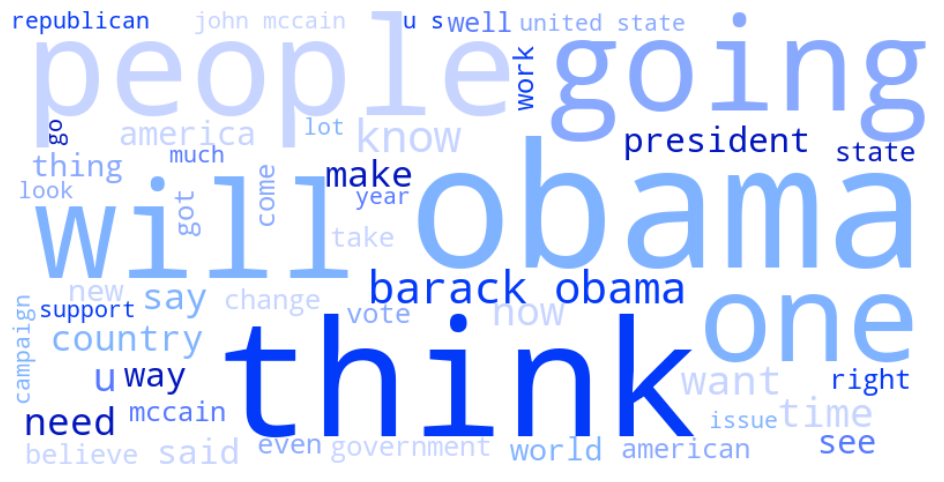

<Figure size 640x480 with 0 Axes>

In [35]:
# Import necessary packages
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib as mpl

colors = ['#0015bc', '#0339f8', '#5578ff', '#89a9ff', '#c6d4ff', '#80b3ff']
cmap = mcolors.ListedColormap(colors)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white', stopwords=STOPWORDS,
                      min_font_size=10, max_font_size=150, colormap= cmap).generate(flattened_string_obama)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("visuals_for_website/obama_wordcloud.png", dpi=400)

## MC Cain word cloud

First: rerun graph processing from Oliver (missing here) and extract the Mc Cain nodes (commented code below):

In [9]:
"""
# Now G contains the network created from the list

# Create a subgraph containing nodes with key phrases that contain "obama" or "Obama"
McCain_nodes = [node for node, attrs in G.nodes(data=True) if any("mccain" in phrase.lower() for phrase in attrs["key_phrases"])]
mccain_subgraph = G.subgraph(McCain_nodes)
graph_to_pickle = mccain_subgraph.copy()

import pickle

# Define filename for pickle file
filename = "mccain_subgraph.pickle"

# Write subgraph to pickle file
with open(filename, "wb") as file:
    pickle.dump(graph_to_pickle, file)
    
"""

'\n# Now G contains the network created from the list\n\n# Create a subgraph containing nodes with key phrases that contain "obama" or "Obama"\nMcCain_nodes = [node for node, attrs in G.nodes(data=True) if any("mccain" in phrase.lower() for phrase in attrs["key_phrases"])]\nmccain_subgraph = G.subgraph(McCain_nodes)\ngraph_to_pickle = mccain_subgraph.copy()\n\nimport pickle\n\n# Define filename for pickle file\nfilename = "mccain_subgraph.pickle"\n\n# Write subgraph to pickle file\nwith open(filename, "wb") as file:\n    pickle.dump(graph_to_pickle, file)\n    \n'

['i was just kidding', "senator mccain has said he will protect bush's tax cuts for big corporations and has proposed nothing to bolster the economic condition of ohio's middle class"]


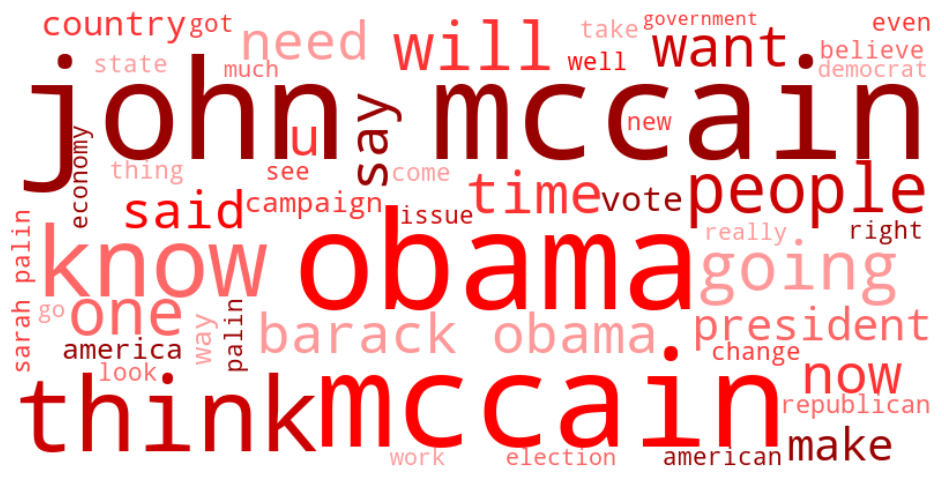

<Figure size 640x480 with 0 Axes>

In [36]:
with open('mccain_subgraph.pickle', 'rb') as file:
    G = pickle.load(file)
    
# Get all "key phrases" node attribute values
key_phrases_mccain = nx.get_node_attributes(G, 'key_phrases').values()
key_phrases_mccain = list(set([phrase.lower() for phrases in key_phrases_mccain for phrase in phrases]))
print(key_phrases_mccain[:2])

flattened_string_mccain = ' '.join(key_phrases_mccain)

# Import necessary packages
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib as mpl

colors = ['#ff0000', '#990000', '#cc0000', '#ff3333', '#ff6666', '#ff9999']
cmap = mcolors.ListedColormap(colors)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white', stopwords=STOPWORDS,
                      min_font_size=10, max_font_size=150, colormap= cmap).generate(flattened_string_mccain)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("visuals_for_website/mccain_wordcloud.png", dpi=400)

## Word cloud of largest connected components (not useful, take communities instead)

In [27]:
"""
from wordcloud import WordCloud

# Assuming G is your NetworkX directed graph object
connected_components = sorted(nx.weakly_connected_components(G), key=len, reverse=True)

# Create a function to generate word clouds
def generate_wordcloud(component, index):
    subgraph = G.subgraph(component)
    key_phrases = [node_attr['key_phrases'] for _, node_attr in subgraph.nodes(data=True)]
    key_phrases_flat = [phrase for phrases in key_phrases for phrase in phrases]
    flattened_string = ' '.join(key_phrases_flat)

    wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white',
                          min_font_size=10, max_font_size=150).generate(flattened_string)

    plt.subplot(5, 2, index + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Component {index + 1}")

# Display the word clouds for the 10 largest connected components
plt.figure(figsize=(20, 40))
for i, component in enumerate(connected_components[:10]):
    generate_wordcloud(component, i)
plt.tight_layout()
plt.show()
"""

'\nfrom wordcloud import WordCloud\n\n# Assuming G is your NetworkX directed graph object\nconnected_components = sorted(nx.weakly_connected_components(G), key=len, reverse=True)\n\n# Create a function to generate word clouds\ndef generate_wordcloud(component, index):\n    subgraph = G.subgraph(component)\n    key_phrases = [node_attr[\'key_phrases\'] for _, node_attr in subgraph.nodes(data=True)]\n    key_phrases_flat = [phrase for phrases in key_phrases for phrase in phrases]\n    flattened_string = \' \'.join(key_phrases_flat)\n\n    wordcloud = WordCloud(width=800, height=400, max_words=50, background_color=\'white\',\n                          min_font_size=10, max_font_size=150).generate(flattened_string)\n\n    plt.subplot(5, 2, index + 1)\n    plt.imshow(wordcloud, interpolation=\'bilinear\')\n    plt.axis("off")\n    plt.title(f"Word Cloud for Component {index + 1}")\n\n# Display the word clouds for the 10 largest connected components\nplt.figure(figsize=(20, 40))\nfor i, comp

In [26]:
"""
import nltk
from textblob import TextBlob
import networkx as nx
from math import log

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load stop words for English, Italian, Spanish, French, and German
stop_words = set(stopwords.words(['english', 'italian', 'spanish', 'french', 'german']))

# Assuming G is your NetworkX directed graph object
connected_components = sorted(nx.weakly_connected_components(G), key=len, reverse=True)

# Function to calculate normalized sentiment score
def calculate_normalized_sentiment_score(component):
    subgraph = G.subgraph(component)
    key_phrases = [node_attr['key_phrases'] for _, node_attr in subgraph.nodes(data=True)]
    key_phrases_flat = [phrase for phrases in key_phrases for phrase in phrases]
    flattened_string = ' '.join(key_phrases_flat)

    sentiment_score = TextBlob(flattened_string).sentiment.polarity

    tokens = nltk.word_tokenize(flattened_string)
    non_stopwords = [word for word in tokens if word.lower() not in stop_words]
    non_stopword_count = len(non_stopwords)

    if non_stopword_count not in [0, 1]:
        log_non_stopword_count = log(non_stopword_count)
        normalized_sentiment_score = sentiment_score / log_non_stopword_count
    else:
        normalized_sentiment_score = sentiment_score

    return normalized_sentiment_score

# Calculate normalized sentiment scores for the 5 largest connected components
normalized_sentiment_scores = [calculate_normalized_sentiment_score(component) for component in connected_components[:10]]

for i, score in enumerate(normalized_sentiment_scores):
    print(f"Normalized sentiment score for the largest connected component {i+1}: {score}")
"""

'\nimport nltk\nfrom textblob import TextBlob\nimport networkx as nx\nfrom math import log\n\nnltk.download(\'punkt\')\nnltk.download(\'stopwords\')\nfrom nltk.corpus import stopwords\n\n# Load stop words for English, Italian, Spanish, French, and German\nstop_words = set(stopwords.words([\'english\', \'italian\', \'spanish\', \'french\', \'german\']))\n\n# Assuming G is your NetworkX directed graph object\nconnected_components = sorted(nx.weakly_connected_components(G), key=len, reverse=True)\n\n# Function to calculate normalized sentiment score\ndef calculate_normalized_sentiment_score(component):\n    subgraph = G.subgraph(component)\n    key_phrases = [node_attr[\'key_phrases\'] for _, node_attr in subgraph.nodes(data=True)]\n    key_phrases_flat = [phrase for phrases in key_phrases for phrase in phrases]\n    flattened_string = \' \'.join(key_phrases_flat)\n\n    sentiment_score = TextBlob(flattened_string).sentiment.polarity\n\n    tokens = nltk.word_tokenize(flattened_string)\n 

## Word cloud of largest communities

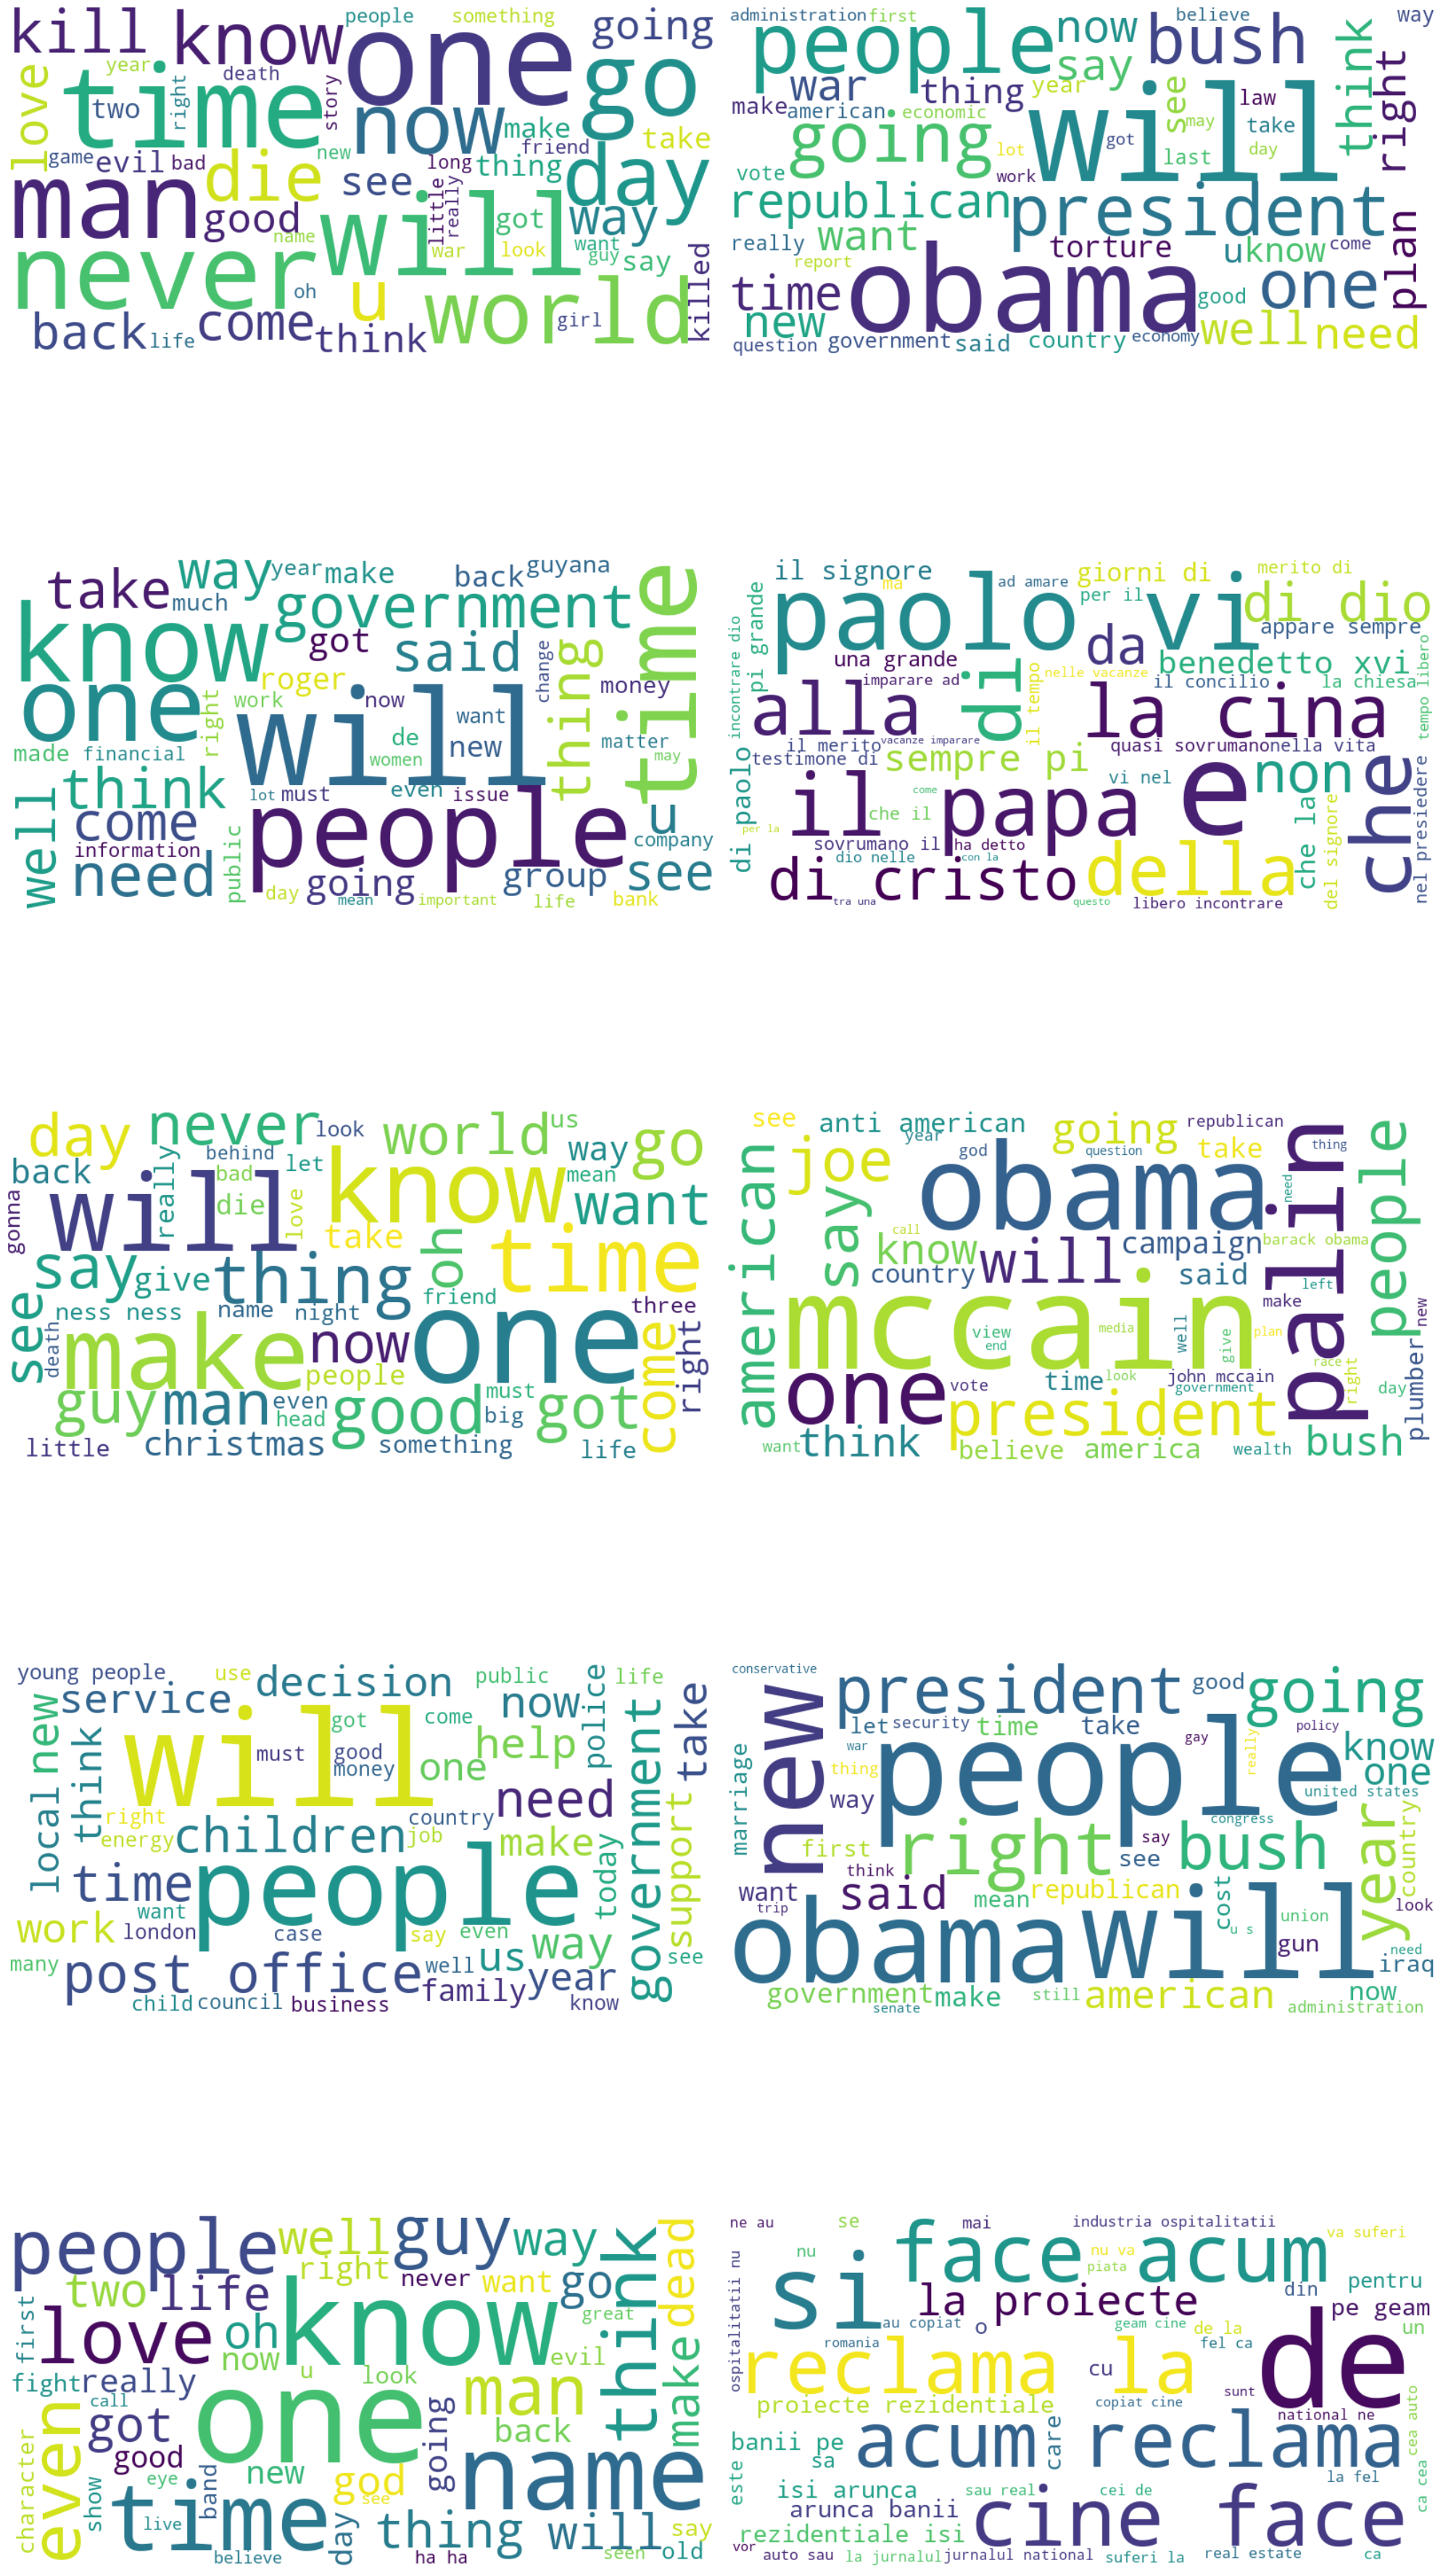

In [37]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to load a network from a pickle file
def load_network_from_pickle(filename):
    with open(filename, "rb") as file:
        network = pickle.load(file)
    return network

# Create a function to generate word clouds
def generate_wordcloud(subgraph, index):
    key_phrases = [node_attr['key_phrases'] for _, node_attr in subgraph.nodes(data=True)]
    key_phrases_flat = [phrase for phrases in key_phrases for phrase in phrases]
    flattened_string = ' '.join(key_phrases_flat)

    wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white',
                          min_font_size=10, max_font_size=150).generate(flattened_string)

    plt.subplot(5, 2, index + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.title(f"Word Cloud for Community {index + 1}")
    plt.savefig(f"visuals_for_website/community{i}_wordcloud.png", dpi=400)

# Load networks from pickle files and generate word clouds
plt.figure(figsize=(20, 40))
for i in range(1, 11):
    filename = f"obama_and_largest_conn_components/community{i}.pickle"
    G = load_network_from_pickle(filename)
    generate_wordcloud(G, i - 1)

plt.tight_layout()
plt.show()

In [23]:
import nltk
import pickle
from textblob import TextBlob
import networkx as nx
from math import log

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load stop words for English, Italian, Spanish, French, and German
stop_words = set(stopwords.words(['english', 'italian', 'spanish', 'french', 'german']))

# Function to load a network from a pickle file
def load_network_from_pickle(filename):
    with open(filename, "rb") as file:
        network = pickle.load(file)
    return network

# Function to calculate normalized sentiment score
def calculate_normalized_sentiment_score(G):
    key_phrases = [node_attr['key_phrases'] for _, node_attr in G.nodes(data=True)]
    key_phrases_flat = [phrase for phrases in key_phrases for phrase in phrases]
    flattened_string = ' '.join(key_phrases_flat)

    sentiment_score = TextBlob(flattened_string).sentiment.polarity

    tokens = nltk.word_tokenize(flattened_string)
    non_stopwords = [word for word in tokens if word.lower() not in stop_words]
    non_stopword_count = len(non_stopwords)

    if non_stopword_count not in [0, 1]:
        log_non_stopword_count = log(non_stopword_count)
        normalized_sentiment_score = sentiment_score / log_non_stopword_count
    else:
        normalized_sentiment_score = sentiment_score

    return normalized_sentiment_score

# Calculate normalized sentiment scores for the communities
communities = []
for i in range(1, 11):
    filename = f"obama_and_largest_conn_components/community{i}.pickle"
    communities.append(load_network_from_pickle(filename))

normalized_sentiment_scores = [calculate_normalized_sentiment_score(G) for G in communities]

for i, score in enumerate(normalized_sentiment_scores):
    print(f"Normalized sentiment score for community {i+1}: {score}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Normalized sentiment score for community 1: 0.004841614049026131
Normalized sentiment score for community 2: 0.007367005211091217
Normalized sentiment score for community 3: 0.008081341063130566
Normalized sentiment score for community 4: -0.0038831628272468464
Normalized sentiment score for community 5: 0.004534058066839077
Normalized sentiment score for community 6: 0.01092854779528603
Normalized sentiment score for community 7: 0.010547768525183902
Normalized sentiment score for community 8: 0.0075872079476689
Normalized sentiment score for community 9: 0.007446840981918268
Normalized sentiment score for community 10: 0.011806491026417676
